<a href="https://colab.research.google.com/github/DanielMerkdo/analitica_marketing/blob/main/preprocesamiento_sql.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cargar entorno drive


In [ ]:
# Montar drive y crear path para sys y para directorio de trabajo

from google.colab import drive
drive.mount('/content/drive')

import sys
import os

# Define el path al directorio de trabajo actual
path = "/content/drive/My Drive/cod/analitica_marketing"


sys.path.append(path) ### para importar archivo de funciones propias a través de import

os.chdir(path) ### para que por defecto suba y descargue archivos partiendo de esa ruta

Mounted at /content/drive


# Cargar las librerias


In [ ]:
!pip install unidecode #(elimina caracteres especiales)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 8.2 MB/s eta 0:00:00


In [ ]:
# Eliminar Warnings
#import warnings
#warnings.filterwarnings("ignore")
# Importar librerias
import sqlite3 as sql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install plotly
import plotly.express as px
!pip install mlxtend
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
import plotly.graph_objects as go
!pip install scikit-learn # install scikit-learn if you haven't already
##escalar fecha
from sklearn.preprocessing import MinMaxScaler # import MinMaxScaler

In [ ]:
import a_funciones as funciones     # Importar las funciones
import importlib
importlib.reload(funciones)

<module 'a_funciones' from '/content/drive/My Drive/cod/analitica_marketing/a_funciones.py'>

#Conectar Entorno SQL

In [ ]:
#Conectar base de datos con el entorno sql
conex=sql.connect("data/db_movies") # conectarse a base de datos existentes


In [ ]:
cur= conex.cursor() #para funciones que ejecutan sql en base de datos, otro tipo de conexión para ejecutar consultas en la bd sin traer ni llevar informacion

#Verificación BD y Lectura en Python


In [ ]:
# consultar el nombre de las tablas en la base de datos
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
cur.fetchall()

[('ratings',), ('movies',)]

In [ ]:
# Así se ven en sql toda la tabla movies
cur.execute("SELECT * FROM movies")
cur.fetchall()

In [ ]:
# Así se ven en sql toda la tabla ratings
cur.execute("SELECT * FROM ratings")
cur.fetchall()

In [ ]:
# Leer la base de datos en el entorno de Python
df_movies= pd.read_sql("SELECT * FROM movies", conex)
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
df_movies.shape
print("La tabla movies tiene", df_movies.shape[0] ," filas y ",df_movies.shape[1] ,"columnas")

La tabla movies tiene 9742  filas y  3 columnas


In [ ]:
df_movies.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [ ]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [ ]:
# Leer la base de datos en el entorno de Python
df_ratings= pd.read_sql("SELECT * FROM ratings", conex)
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
df_ratings.shape
print("La tabla ratings tiene", df_ratings.shape[0] ," filas y ",df_ratings.shape[1] ,"columnas")

La tabla ratings tiene 100836  filas y  4 columnas


In [ ]:
df_ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [ ]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


# Consultas con SqL

In [ ]:
### para verificar las tablas que hay disponibles
cur.execute("SELECT name FROM sqlite_master where type='table' ")
cur.fetchall()

[('ratings',), ('movies',)]

In [ ]:
#Total de registros en la tabla ratings
pd.read_sql("select count(*) from ratings", conex)

,count(*)
0,100836


In [ ]:
#Total de registros en la tabla movies
pd.read_sql("select count(*) from movies", conex)

,count(*)
0,9742


In [ ]:
# Consultar el nombre de las columnas de la tabla "ratings"
column_names_query = "SELECT name FROM PRAGMA_TABLE_INFO('ratings')"
columns_ratings = pd.read_sql(column_names_query, conex)
columns_ratings

,name
0,userId
1,movieId
2,rating
3,timestamp


In [ ]:
# Consultar el nombre de las columnas de la tabla "movies"
column_names_query = "SELECT name FROM PRAGMA_TABLE_INFO('movies')"
columns_movies = pd.read_sql(column_names_query, conex)
columns_movies

,name
0,movieId
1,title
2,genres


In [ ]:
## Consultar los userld que han calificado peliculas en la plataforma
pd.read_sql("""select count(distinct userId) from ratings""", conex)


,count(distinct userId)
0,610


In [47]:
## Consultar los userld que aparecen más de una vez en la tabla ratings
query = """
SELECT
  userId,
  COUNT(*) AS cantidad
FROM ratings
GROUP BY userId
HAVING COUNT(*) > 1;
"""
df_user_counts = pd.read_sql(query, conex)
df_user_counts

,userId,cantidad
0,1,232
1,2,29
2,3,39
3,4,216
4,5,44
...,...,...
605,606,1115
606,607,187
607,608,831
608,609,37


In [48]:
# Consultar los movieId que aparecen más de una vez en la tabla movies
query = """
SELECT
  movieId,
  COUNT(*) AS cantidad
FROM movies
GROUP BY movieId
HAVING COUNT(*) > 1;
"""
df_movie_counts = pd.read_sql(query, conex)
df_movie_counts

,movieId,cantidad


In [49]:
# Consultar registros duplicados en la tabla ratings
query = """
SELECT
    userId,
    movieId,
    rating,
    timestamp,
    COUNT(*) AS num_duplicates
FROM
    ratings
GROUP BY
    userId,
    movieId,
    rating,
    timestamp
HAVING
    COUNT(*) > 1;
"""
duplicate_records = pd.read_sql(query, conex)
duplicate_records

,userId,movieId,rating,timestamp,num_duplicates


In [50]:
# Consultar registros duplicados en la tabla movies
query = """
SELECT
    movieId,
    title,
    COUNT(*) AS num_duplicates
FROM
    movies
GROUP BY
    movieId,
    title
HAVING
    COUNT(*) > 1;
"""

duplicate_records = pd.read_sql(query, conex)
duplicate_records

,movieId,title,num_duplicates


In [51]:
# Consultar datos nulos en la tabla ratings
query = """
SELECT *
FROM ratings
WHERE userId IS NULL OR movieId IS NULL OR rating IS NULL OR timestamp IS NULL;
"""
null_records = pd.read_sql(query, conex)
null_records

,userId,movieId,rating,timestamp


In [52]:
# Consultar datos nulos en la tabla movies
query = """
SELECT *
FROM movies
WHERE title IS NULL OR genres IS NULL;
"""
null_records = pd.read_sql(query, conex)
null_records

,movieId,title,genres


In [53]:
# Géneros en la tabla movies
genres_movies = pd.read_sql("SELECT DISTINCT genres FROM movies", conex)
print(genres_movies)

                                          genres
0    Adventure|Animation|Children|Comedy|Fantasy
1                     Adventure|Children|Fantasy
2                                 Comedy|Romance
3                           Comedy|Drama|Romance
4                                         Comedy
..                                           ...
946            Adventure|Mystery|Sci-Fi|Thriller
947                   Action|Comedy|Crime|Horror
948             Action|Adventure|Children|Sci-Fi
949       Action|Adventure|Comedy|Fantasy|Sci-Fi
950              Action|Animation|Comedy|Fantasy

[951 rows x 1 columns]


# Nueva sección

In [ ]:
# Géneros en la tabla ratings (unidos con movies)
genres_ratings = pd.read_sql("SELECT DISTINCT m.genres FROM ratings AS r JOIN movies AS m ON r.movieId = m.movieId", conex)
print(genres_ratings)

                                          genres
0    Adventure|Animation|Children|Comedy|Fantasy
1                                 Comedy|Romance
2                          Action|Crime|Thriller
3                               Mystery|Thriller
4                         Crime|Mystery|Thriller
..                                           ...
946                         Children|Crime|Drama
947                   Drama|Fantasy|Thriller|War
948                         Drama|Horror|Romance
949                        Horror|Romance|Sci-Fi
950                    Action|Crime|Drama|Sci-Fi

[951 rows x 1 columns]


In [ ]:
# Distribución de la columna 'rating'
query_rating = """
SELECT
    rating,
    COUNT(*) AS frequency
FROM
    ratings
GROUP BY
    rating
ORDER BY
    rating;
"""
df_rating_dist = pd.read_sql_query(query_rating, conex)
print("Distribución de Rating:\n", df_rating_dist)
conex.close()

Distribución de Rating:
    rating  frequency
0     0.5       1370
1     1.0       2811
2     1.5       1791
3     2.0       7551
4     2.5       5550
5     3.0      20047
6     3.5      13136
7     4.0      26818
8     4.5       8551
9     5.0      13211


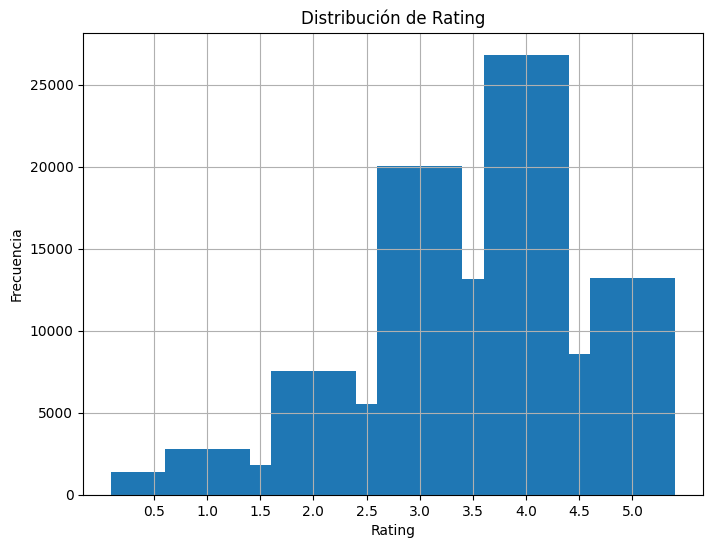

In [ ]:
#Grafico de la distribucion del objeto Rating
plt.figure(figsize=(8, 6))  # Ajustar el tamaño de la figura si es necesario
plt.bar(df_rating_dist['rating'], df_rating_dist['frequency'])
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.title('Distribución de Rating')
plt.xticks(df_rating_dist['rating'])  # Mostrar todos los valores de rating en el eje x
plt.grid(True)
plt.show()

In [ ]:
conex = sql.connect("/content/analitica_marketing/db_movies")

In [ ]:
### calcular cada usuario cuantas peliculas califico
ratings_usersconteo= pd.read_sql("""select "userId" as user_id,
                                count(*)as calification
                                from ratings
                                group by "userId"
                                order by calification asc
                                """, conex)
fig= px.histogram(ratings_usersconteo, x="calification", title= "Numero de calificaciones", nbins=10)
fig.show()

In [ ]:
###Tabla de usuarios que calificaron mas de 20 películas y menos de 400
ratings_users2= pd.read_sql("""select "userId" as user_id,
                                count(*)as calification
                                from ratings
                                group by "userId"
                                having calification between 20 and 400
                                order by calification asc
                                """, conex)
ratings_users2

,user_id,calification
0,53,20
1,147,20
2,189,20
3,194,20
4,207,20
...,...,...
544,391,386
545,514,397
546,156,398
547,45,399


In [ ]:
### Histograma de usuarios que calificaron mas de 20 películas y menos de 400
fig= px.histogram(ratings_users2, x="calification", title= "Numero de calificaciones", nbins=10)
fig.show()

In [ ]:
### Tabla de acuerdo a la calificacion de cada pelicula, top 10 de las mas calificadas
ratings_movies= pd.read_sql("""select "movieId" as movie_id,
                                count(*)as calification
                                from ratings
                                group by "movieId"
                                order by calification desc
                                limit 10
                                """, conex)
ratings_movies

,movie_id,calification
0,356,329
1,318,317
2,296,307
3,593,279
4,2571,278
5,260,251
6,480,238
7,110,237
8,589,224
9,527,220


In [ ]:
### Convertirlas a tipo string
ratings_movies= ratings_movies.astype({'movie_id': 'str'})
ratings_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie_id      10 non-null     object
 1   calification  10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 292.0+ bytes


In [ ]:
### Grafico top 10 más calificadas
data= go.Bar(x= ratings_movies.movie_id, y= ratings_movies.calification, text=ratings_movies.calification)
Layout= go.Layout(title="Total de calificaciones por pelicula", xaxis=dict(title="movieId"))
fig= go.Figure(data, Layout)
fig.show()

In [ ]:
#func.ejecutar_sql(analitica_marketing, cur)
#cur.execute("select name from sqlite master where type= table' ")
#cur.fetchall()

In [ ]:
### Obtener generos y convertirlos a boleanos
movies= pd.read_sql("select * from movies", conex)
genres = genres_movies["genres"].str.split("|").tolist() # Get genres and convert to list of lists
te = TransactionEncoder()
genres_encoded = te.fit_transform(genres)
genres = pd.DataFrame(genres_encoded, columns=te.columns_)
genres = genres.drop(["(no genres listed)"], axis=1) # Assuming you want to drop this column
genres2 = genres.copy()
genres2.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,False,True,True,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
genres2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Action       951 non-null    bool 
 1   Adventure    951 non-null    bool 
 2   Animation    951 non-null    bool 
 3   Children     951 non-null    bool 
 4   Comedy       951 non-null    bool 
 5   Crime        951 non-null    bool 
 6   Documentary  951 non-null    bool 
 7   Drama        951 non-null    bool 
 8   Fantasy      951 non-null    bool 
 9   Film-Noir    951 non-null    bool 
 10  Horror       951 non-null    bool 
 11  IMAX         951 non-null    bool 
 12  Musical      951 non-null    bool 
 13  Mystery      951 non-null    bool 
 14  Romance      951 non-null    bool 
 15  Sci-Fi       951 non-null    bool 
 16  Thriller     951 non-null    bool 
 17  War          951 non-null    bool 
 18  Western      951 non-null    bool 
dtypes: bool(19)
memory usage: 17.8 KB


In [ ]:
conex = sql.connect("/content/analitica_marketing/db_movies")
cur = conex.cursor()

In [ ]:
##Insertar la columna de movield y el title
if "movieId" not in genres2.columns:
    genres2.insert(0, "movieId", movies["movieId"])
if "title" not in genres2.columns:
    genres2.insert(1, "title", movies["title"])
genres2.to_sql("genres2", conex, if_exists="replace")
cur.execute("ALTER TABLE genres2 ADD COLUMN fecha INTEGER")

In [ ]:
### Extraer año del título estreno de la película
cur.execute("""
    UPDATE genres2
    SET fecha = CAST(SUBSTR(title, -5, 4) AS INTEGER)
""")

movies2 = pd.read_sql("SELECT * FROM genres2", conex)
movies2.head()

,index,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,fecha
0,0,1,Toy Story (1995),0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1995
1,1,2,Jumanji (1995),0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
2,2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1995
3,3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1995
4,4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1995


In [ ]:
## Escalar fecha
sc= MinMaxScaler()
movies2["fecha"]= sc.fit_transform(movies2[["fecha"]])
movies2.to_sql("movies2", conex, if_exists="replace")

movies3= movies2.drop(columns=[ "title", "index", "fecha", "movieId"])
movies3.to_sql("movies3", conex, if_exists="replace")

951

In [ ]:
### Utilizar tabla de rating final para los modelos
rating_final= pd.read_sql("select * from ratings", conex)

rating_final["fecha"]= pd.read_sql("select fecha from movies2", conex)

ratings1= rating_final.copy()
ratings1.head()

,userId,movieId,rating,timestamp,fecha
0,1,1,4.0,964982703,0.969231
1,1,3,4.0,964981247,0.969231
2,1,6,4.0,964982224,0.969231
3,1,47,5.0,964983815,0.969231
4,1,50,5.0,964982931,0.969231


In [ ]:
### Se elimina el timestamp de la tabla de ratings, para no afectar los sistemas de recomendacion
ratings1= ratings1.drop(columns=["timestamp"])

ratings1.to_sql("ratings1", conex, if_exists="replace")


100836

In [ ]:
### Crear una tabla para los modeleos finales
ratingtittle= pd.read_sql("""select b.*,a.title
                            from ratings1 b left join movies a on b.movieId=a.movieId
                            """, conex)
ratingtittle.head()

,index,userId,movieId,rating,fecha,title
0,0,1,1,4.0,0.969231,Toy Story (1995)
1,1,1,3,4.0,0.969231,Grumpier Old Men (1995)
2,2,1,6,4.0,0.969231,Heat (1995)
3,3,1,47,5.0,0.969231,Seven (a.k.a. Se7en) (1995)
4,4,1,50,5.0,0.969231,"Usual Suspects, The (1995)"


#CONSULTAS JAVIER


In [ ]:
pd.read_sql(""" select * from ratings where  "rating" =5 order by "index" desc""", conex)

,userId,movieId,rating,timestamp
0,1,47,5.0,964983815
1,1,50,5.0,964982931
2,1,101,5.0,964980868
3,1,151,5.0,964984041
4,1,157,5.0,964984100
...,...,...,...,...
13206,610,158238,5.0,1479545219
13207,610,164179,5.0,1493845631
13208,610,168248,5.0,1493850091
13209,610,168250,5.0,1494273047


In [ ]:
## Consulta que muestre el promedio de rating de la película con Id = 1
pd.read_sql("""select movieId, avg(rating)
            from ratings
            where movieId=1
            group by movieId
            order by userId asc""", conex)

,movieId,avg(rating)
0,1,3.92093


In [ ]:
#left join tabla movies - rating
pd.read_sql(""" select * from movies  left join ratings on movies.movieId=ratings.movieId""", conex)

,movieId,title,genres,userId,movieId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,1.0,4.0,9.649827e+08
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,1.0,4.0,8.474350e+08
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,1.0,4.5,1.106636e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,1.0,2.5,1.510578e+09
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17.0,1.0,4.5,1.305696e+09
...,...,...,...,...,...,...,...
100849,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184.0,193581.0,4.0,1.537109e+09
100850,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184.0,193583.0,3.5,1.537110e+09
100851,193585,Flint (2017),Drama,184.0,193585.0,3.5,1.537110e+09
100852,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184.0,193587.0,3.5,1.537110e+09


In [ ]:
## Consulta que Muestre la lista de nombres de las películas que no tienen evaluaciones (ratings).
pd.read_sql("""select a.title, count(b.rating) as numero_ratings
            from movies a left join ratings b on a.movieId=b.movieId
            where b.rating is null
            group by a.title
           order by numero_ratings asc """, conex)

,title,numero_ratings
0,"Browning Version, The (1951)",0
1,Call Northside 777 (1948),0
2,Chalet Girl (2011),0
3,"Chosen, The (1981)",0
4,"Color of Paradise, The (Rang-e khoda) (1999)",0
5,For All Mankind (1989),0
6,I Know Where I'm Going! (1945),0
7,In the Realms of the Unreal (2004),0
8,"Innocents, The (1961)",0
9,Mutiny on the Bounty (1962),0


In [42]:
## Consulta que Muestre la lista de nombres de las películas que tienen 1 evaluación (ratings).
pd.read_sql("""select a.title, count(b.rating) as numero_ratings
            from movies a left join ratings b on a.movieId=b.movieId
            group by a.title
            having numero_ratings=1
            order by numero_ratings asc """, conex)

,title,numero_ratings
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Salem's Lot (2004),1
3,'Tis the Season for Love (2015),1
4,'night Mother (1986),1
...,...,...
3436,Zoom (2006),1
3437,Zoom (2015),1
3438,Zulu (2013),1
3439,anohana: The Flower We Saw That Day - The Movi...,1


In [46]:
## Consulta qué muestre el grupo de géneros, ocupa el puesto 9 de los que tienen más películas.
pd.read_sql("""select genres, count(movieId) as cantidad
            from movies
            group by genres
            order by cantidad desc
            limit 1 offset 8""", conex)

,genres,cantidad
0,Horror,167
